In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r"C:\Users\poorvi\Desktop\auto_project")
from logs.logger import App_Logger

In [2]:
app_logs = App_Logger()

In [3]:
auto_data =pd.read_csv(r"C:\Users\poorvi\Desktop\auto_project\Training_preprocessing\preprocessed_file.csv")

## IMPORTING NECESSARY LIBRARIES

In [4]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"starting of EXploratory data analysis")

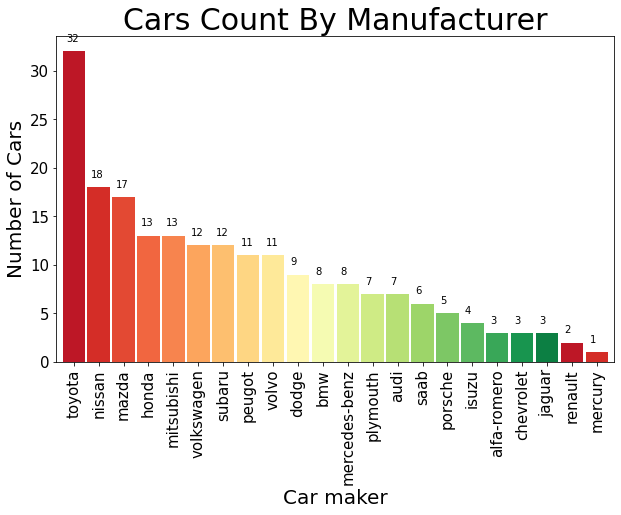

In [5]:
plt.subplots(figsize=(10,6))
ax=auto_data['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.savefig("Charts/cars_counts.png")
plt.show()


In [6]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Plotting count plots for make columns")

#### FROM THE ABOVE COUNT PLOTS OF ALL CAR makeRS WE HAVE GATHERED THAT:
    
    1)TOYOTA ,nissan and mazda has the highest number of cars in the data
    
    2)mercury isuzu and renault has the minimum number of cars very less i.e 1,2,2
    
    3)Japaneese cars has most share in the data i.e toyota ,nissan

In [7]:
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [8]:
fig = px.pie(auto_data,names = 'drive-wheels',title = "                        share of all drive wheels",height=350)
fig.show()          

In [9]:
fig = px.pie(auto_data,height=350,names = 'num-of-doors',title = "share of all NUM-OF-DOORS")
fig.show()

In [10]:
fig = px.pie(auto_data,names = 'engine-type',title = "share of all engine-types",height=350)
fig.show()

In [11]:
fig = px.pie(auto_data,names = 'engine-location',title = "share of all engine-locations",height=350)
fig.show()

In [12]:
fig = px.pie(auto_data,names = 'body-style',title = "share of all body-style",height=350)
fig.show()

In [13]:
fig = px.pie(auto_data,names = 'fuel-type',title = "share of all fuel types",height=350)
fig.show()

In [14]:
fig = px.pie(auto_data,names = 'aspiration',title = "share of all aspiration types",height=350)
fig.show()

In [15]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Plotting pie charts  for categorical columns")

#### FROM THE ABOVE PIE CHARTS IT IS CLEAR THAT :

1) most cars has the fwd types of drive-wheels which has 58.27% share

2)most of the cars has four doors  approx 57.2% cars has 4 doors

3)aspiration of maximum cars is standard beacuse it is very outdated data when turbo aspirated cars were not used more

4)body-syle of maximum cars is sedan and hatchback

5)engine location is mostly preferred to frontrather than rear

6)engine types is ohc mostly preferrred 72%

7) maximum no of cars has the fuel used as gas and very less uses diesel

### NOW WE WILL DROP THE make COLUMN AS IT IS NOT A PREDICTOR OF THE PRICE ,,,,,,,, COMPANY NAME  OF THE CAR DOES NOT DECIDES ITS PRICE

In [16]:
auto_data.drop("make",axis =1,inplace=True)

In [17]:
auto_data

,Unnamed: 0,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,2,1.0,122.0,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,3,2.0,164.0,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,4,2.0,164.0,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1.0,95.0,gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,201,-1.0,95.0,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,202,-1.0,95.0,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,203,-1.0,95.0,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


# NOW WE CAN SAVE THIS CLEAN DATASET INTO AN CSV FILE FOR FURTHUR USES

In [18]:
auto_data.dtypes

Unnamed: 0             int64
symboling            float64
normalized-losses    float64
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinder       object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [19]:
auto_data.head()

,Unnamed: 0,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,2,1.0,122.0,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,3,2.0,164.0,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,4,2.0,164.0,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# NOW WE WILL NORMALIZE SOME COLUMNS THAT MEANS WE WILL make THEIR MEAN TO 0 AND VARIANCE TO 1

In [20]:
from scipy import stats

In [21]:
auto_data.head()

,Unnamed: 0,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,2,1.0,122.0,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,3,2.0,164.0,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,4,2.0,164.0,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [22]:
auto_data.dtypes

Unnamed: 0             int64
symboling            float64
normalized-losses    float64
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinder       object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [23]:
auto_data.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.151621,-0.238306,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260077,-0.160844,0.150276,-0.013316,-0.203541,0.015940,0.011255,-0.116555
symboling,-0.151621,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,-0.238306,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,0.129729,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,0.170636,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,0.052387,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,0.255960,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,0.071962,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.033930,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,0.260077,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300


In [24]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Finding corelation between target variable and features")

# NOW WE FIND CORRELATION BETWEEN PRICE VALUE AND NUMERICAL VARIABLES USING PEARSONS CORRELATION COEFFICIENT

POSITIVE PEARSON CORREALTION COEFFICIENT MEANS THAT THERE IS POSITIVE CORRELATION WHILE NEGATIVE CORRALATION COEFFICIENT MEANS NEGATIVE CORREALTION 

WE WILL ALSO SEE THE P-VALUE FOR THIS PURPOSE : -


p-value is < 0.001 we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant.

the p-value is < 0.1: there is weak evidence that the correlation is significant.

the p-value is > 0.1: there is no evidence that the correlation is significant.



In [25]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"choosing the best features among numerical columns")

In [26]:
 from scipy import stats

In [27]:
x = stats.pearsonr(auto_data["height"],auto_data["price"])
print("correlation coefficient between height and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between height and price is ----> 0.13438751871051804 

, p-value is--->  0.054719820484246985


In [28]:
x =stats.pearsonr(auto_data["normalized-losses"],auto_data["price"])
print("correlation coefficient between noromalized -losses and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between noromalized -losses and price is ----> 0.13399873429274337 

, p-value is--->  0.05543057826318259


In [29]:
x =stats.pearsonr(auto_data["wheel-base"],auto_data["price"])
print("correlation coefficient between wheel-base and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between wheel-base and price is ----> 0.5831681499789547 

, p-value is--->  4.527625545686765e-20


In [30]:
x= stats.pearsonr(auto_data["length"],auto_data["price"])
print("correlation coefficient between length and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between length and price is ----> 0.6829862954386219 

, p-value is--->  1.6498873291218535e-29


In [31]:
x =stats.pearsonr(auto_data["width"],auto_data["price"])
print("correlation coefficient between width and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between width and price is ----> 0.7286988175931839 

, p-value is--->  3.214520483804664e-35


In [32]:
x =stats.pearsonr(auto_data["curb-weight"],auto_data["price"])
print("correlation coefficient between curb-weight and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between curb-weight and price is ----> 0.8208247333547292 

, p-value is--->  2.86633210702689e-51


In [33]:
x =stats.pearsonr(auto_data["engine-size"],auto_data["price"])
print("correlation coefficient between engine-size and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between engine-size and price is ----> 0.8617522436859721 

, p-value is--->  9.669661923634776e-62


In [34]:
x =stats.pearsonr(auto_data["bore"],auto_data["price"])
print("correlation coefficient between bore and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between bore and price is ----> 0.5323000195387406 

, p-value is--->  2.1398306512856245e-16


In [35]:
x =stats.pearsonr(auto_data["stroke"],auto_data["price"])
print("correlation coefficient between stroke and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between stroke and price is ----> 0.08209529554134329 

, p-value is--->  0.24191456857746316


In [36]:
x =stats.pearsonr(auto_data["compression-ratio"],auto_data["price"])
print("correlation coefficient between compression-ratio and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between compression-ratio and price is ----> 0.07099036277901556 

, p-value is--->  0.31178249194905244


In [37]:
x =stats.pearsonr(auto_data["horsepower"],auto_data["price"])
print("correlation coefficient between horsepower and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between horsepower and price is ----> 0.7579169537498176 

, p-value is--->  1.6076703978131245e-39


In [38]:
x=stats.pearsonr(auto_data["peak-rpm"],auto_data["price"])
print("correlation coefficient between peak-rpm and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between peak-rpm and price is ----> -0.10085406591169083 

, p-value is--->  0.1501924695423236


In [39]:
x = stats.pearsonr(auto_data["city-mpg"],auto_data["price"])
print("correlation coefficient between city-mpg and price is ---->",x[0], "\n, p-value is---> ", x[1])

correlation coefficient between city-mpg and price is ----> -0.6674492651600002 
, p-value is--->  8.463700497727927e-28


In [40]:
x =stats.pearsonr(auto_data["highway-mpg"],auto_data["price"])
print("correlation coefficient between highway-mpg and price is ---->",x[0], "\n\n, p-value is---> ", x[1])

correlation coefficient between highway-mpg and price is ----> -0.6905257341183488 

, p-value is--->  2.23246740583743e-30


Observing the p vslues of the above correlation
The top features who have significant relation with the price variable are:
1. length,
2. width,
3. curb-weight,
4. engine-size,
5. bore,
6. horsepower,
7. city-mpg,
8. highway-mpg

In [41]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"8 best features have been chosen")

In [42]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"plotting scatter plots fro each numerical feature againt the target variable")

#### PAIR PLOT OF THE HIGHLY CORRELATED FEATURES WITH THE TARGET VARIABLE

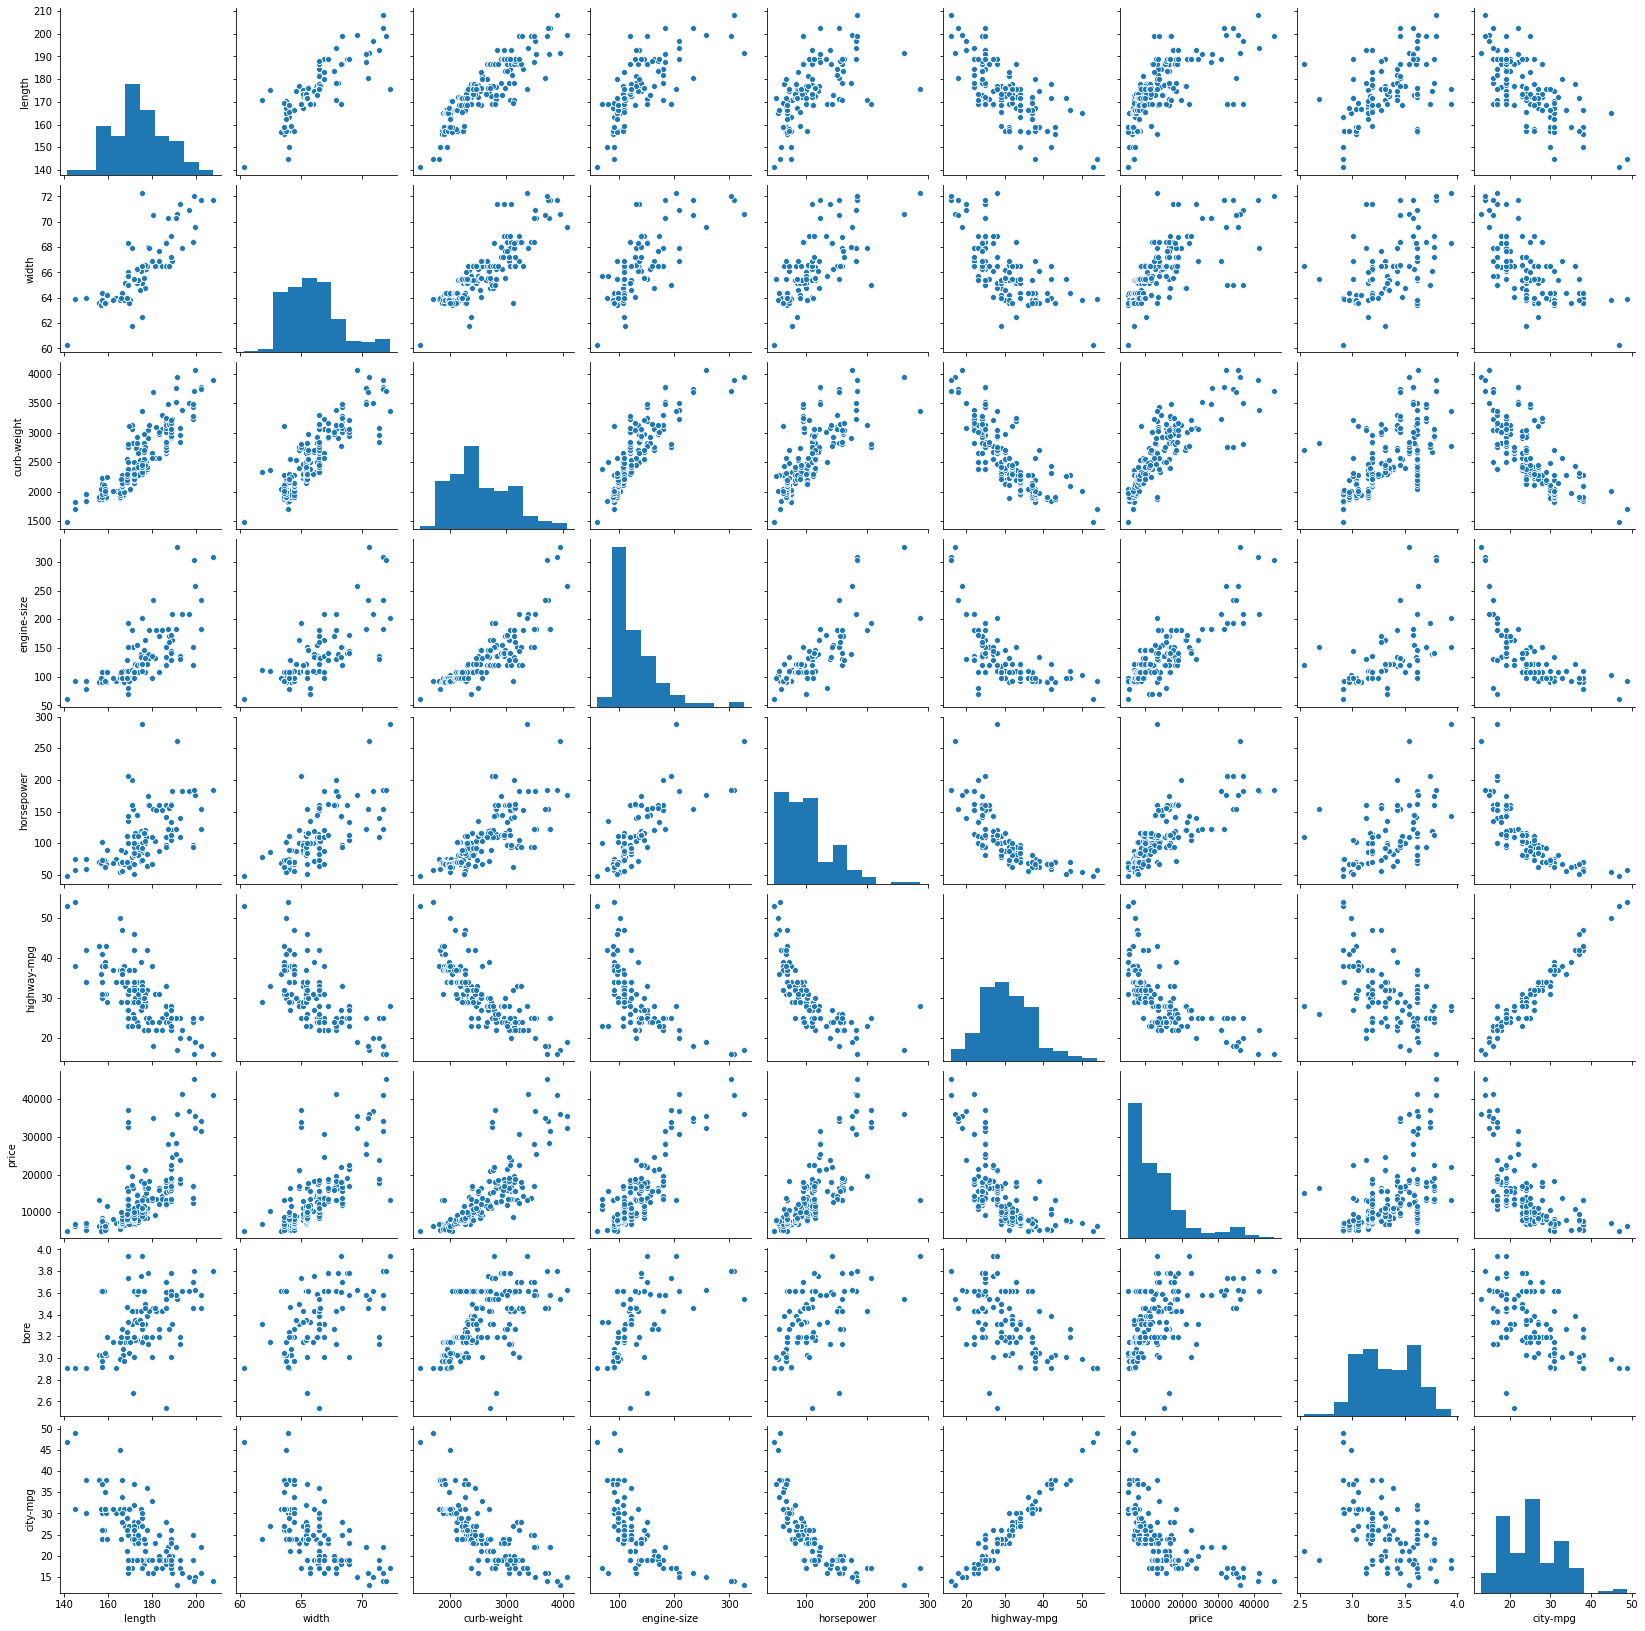

In [43]:

ax = sns.pairplot(auto_data[["length","width", "curb-weight","engine-size","horsepower","highway-mpg","price","bore","city-mpg"]], palette='dark',diag_kind="hist") 
plt.savefig("Charts/scatter_plots.png")

#### FROM THE ABOVE PAIR PLOT WE CAN FIND OUT THAT:

1)the car with the high price has low mileage,beacusae expensive cars focuses more on luxury rather than mileage

2)more the horsepower values of the car more is its price

3)Length,width,curb-weight ,engine-size are highly positively correlated with the price variable


In [44]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Scattter plots plotted")

In [45]:
auto_data.head(2)

,Unnamed: 0,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,1,3.0,122.0,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0


In [46]:
cat_data = auto_data.select_dtypes(include=[np.object])
cat_data

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinder,fuel-system
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [47]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"counting unique values in each categorical column ")

In [48]:
for i in cat_data:
    x = cat_data[i].value_counts()
    print("uniques values in " ,i ,"is--->\n",x,"\n")

uniques values in  fuel-type is--->
 gas       185
diesel     20
Name: fuel-type, dtype: int64 

uniques values in  aspiration is--->
 std      168
turbo     37
Name: aspiration, dtype: int64 

uniques values in  num-of-doors is--->
 four    116
two      89
Name: num-of-doors, dtype: int64 

uniques values in  body-style is--->
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64 

uniques values in  drive-wheels is--->
 fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64 

uniques values in  engine-location is--->
 front    202
rear       3
Name: engine-location, dtype: int64 

uniques values in  engine-type is--->
 ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64 

uniques values in  num-of-cylinder is--->
 four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinder, dty

#### now we will find out the categorical features from the actual data

#### THEN we will apply ANOVA test in the to find out the most significant features among them

In [49]:
cat_data = auto_data.select_dtypes(exclude=[np.number])

In [50]:
cat_data

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinder,fuel-system
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [51]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"appplying anova test on the categoricla columns to find the best features among them")

<ipython-input-52-08e0c76f416c>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<module 'matplotlib.pyplot' from 'C:\\Users\\poorvi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

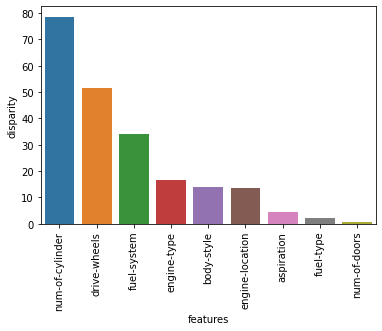

In [52]:
cat   = cat_data.columns
cat
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['price'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['price'] = auto_data.price.values
k = anova(cat_data) 
k['disparity'] = np.log(1/k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt.savefig("Charts/anova_test.png")
plt 


FROM THE ABOVE CHART IT IS FOUND THAT THE SIGNIFICANT FEATURES FOR CAR PRICE PREDICTION ARE

num-of-cylinder

drive-wheels

fuel-system

engine-type

In [53]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"we found the best 2 categorical features")

In [54]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txtt",'+a')
app_logs.log(file,"NOW replacing some bad data from the dataset")

# NOW WE WILL  EXTRACT THE IMPORTANT FEATURES FROM THE DATA FOR FURTHER MODEL BUILDING

In [55]:
auto_data.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinder', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [56]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"removal of bad data done")

In [57]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Now binding all the important feautres together")

In [58]:
imp_feat  = auto_data[["length","width",'horsepower','curb-weight',"engine-size","city-mpg","highway-mpg",'drive-wheels','num-of-cylinder',]]

In [59]:
imp_feat['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [60]:
imp_feat['num-of-cylinder'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [61]:
imp_feat['num-of-cylinder'].replace({"three":"eight","twelve":"eight"},inplace  = True)

C:\Users\poorvi\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
imp_feat['num-of-cylinder'].unique()

array(['four', 'six', 'five', 'eight', 'two'], dtype=object)

In [63]:
imp_feat

,length,width,horsepower,curb-weight,engine-size,city-mpg,highway-mpg,drive-wheels,num-of-cylinder
0,168.8,64.1,111.0,2548.0,130.0,21.0,27.0,rwd,four
1,168.8,64.1,111.0,2548.0,130.0,21.0,27.0,rwd,four
2,171.2,65.5,154.0,2823.0,152.0,19.0,26.0,rwd,six
3,176.6,66.2,102.0,2337.0,109.0,24.0,30.0,fwd,four
4,176.6,66.4,115.0,2824.0,136.0,18.0,22.0,4wd,five
...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,114.0,2952.0,141.0,23.0,28.0,rwd,four
201,188.8,68.8,160.0,3049.0,141.0,19.0,25.0,rwd,four
202,188.8,68.9,134.0,3012.0,173.0,18.0,23.0,rwd,six
203,188.8,68.9,106.0,3217.0,145.0,26.0,27.0,rwd,six


In [64]:
imp_feat.describe()

,length,width,horsepower,curb-weight,engine-size,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,174.049268,65.907805,104.256158,2555.565854,126.907317,25.219512,30.751220
std,12.337289,2.145204,39.519211,520.680204,41.642693,6.542142,6.886443
min,141.100000,60.300000,48.000000,1488.000000,61.000000,13.000000,16.000000
25%,166.300000,64.100000,70.000000,2145.000000,97.000000,19.000000,25.000000
50%,173.200000,65.500000,95.000000,2414.000000,120.000000,24.000000,30.000000
75%,183.100000,66.900000,116.000000,2935.000000,141.000000,30.000000,34.000000
max,208.100000,72.300000,288.000000,4066.000000,326.000000,49.000000,54.000000


In [65]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Plotting box plots for numerical columns for outliers detection")

##    CHECKING AND HANDLING OUTLIERS

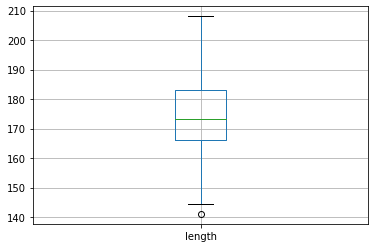

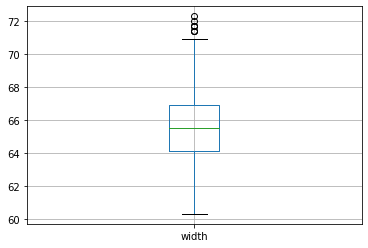

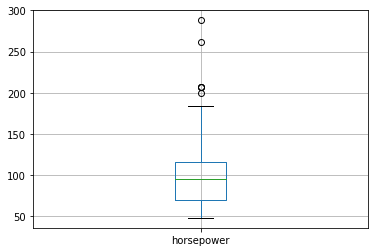

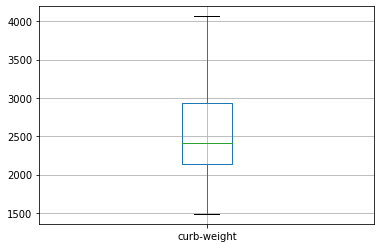

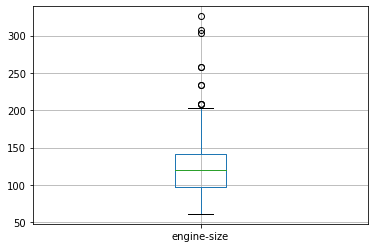

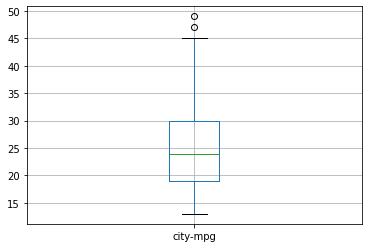

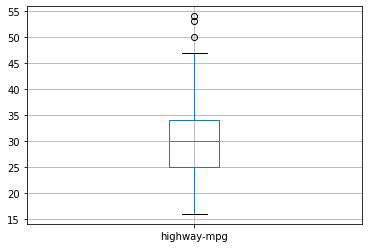

In [66]:
for column in imp_feat.select_dtypes(include=[np.number]):
    plt.figure()
    imp_feat.boxplot([column])
    plt.savefig("Charts/{}_boxplots.png".format(column)) 
    plt.show()

#### FROM THE ABOVE BOX PLOTS OF THE NUMERICAL COLUMNS WE CAN SEE THAT THERE ARE MANY OUTLIERS IN THE ["WIDTH,"ENGINE SIZE"] COLUMNS SO WE CAN HANDLE THEM BY IMPUTING A SUITABLE VALUE INSTEAD OF THEIR PLACE

#### IN THE ENGINE-SIZE COLUMN WE CAN SEE THAT WE HAVE OUTLIERS GREATER THAN 200
#### IN THE WIDTH COLUMN WE CAN SEE THAT WE HAVE OUTLIERS GREATER THAN 2

#### WE WILL  REPLACE ALL THE OUTLIERS WITH THE MAX VALUES OF THESE COLUMNS

NOW WE WILL FIRSTLY KNOW THE INDEXES WHERE THESE OUTLIERS ARE LOCATED

In [67]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Removing outliers now")

#### FOR WIDTH 

In [68]:
loc= imp_feat[imp_feat['width']>2].index.tolist() 
imp_feat["width"].iloc[loc]

0      64.1
1      64.1
2      65.5
3      66.2
4      66.4
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: width, Length: 205, dtype: float64

In [69]:
imp_feat["width"].iloc[loc] =np.quantile(imp_feat["width"],0.75)
imp_feat["width"].iloc[loc]

C:\Users\poorvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-63c250b9d2e4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      66.9
1      66.9
2      66.9
3      66.9
4      66.9
       ... 
200    66.9
201    66.9
202    66.9
203    66.9
204    66.9
Name: width, Length: 205, dtype: float64

#### FOR ENGINE-SIZE

In [70]:
loc= imp_feat[imp_feat["engine-size"]>200].index.tolist()

In [71]:
loc

[15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 129]

In [72]:
imp_feat["engine-size"].iloc[loc] =np.quantile(imp_feat["engine-size"],0.75)

C:\Users\poorvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-edf293fc0288>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"removal of outliers done")

### IN OUR DATA WE HAVE COLUMNS SUCH AS ["CITY-MPG'HIGHWAY-MPG'] AND ['LENGTH','WIDTH'] WHICH ARE VERY CORRELATED TO EACH OTHER SO WE CAN REMOVE THEM BY SOME OPERATIONS

#### -------------------> 
IN THE CITY-MP AND HIGHWAY-MPG WE WILL make A NEW FEAUTRE OF THEIR DIFFERNECE AND DROP BOTH OF THEM

In [74]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Adding some new features and then removing irrelevant features")

In [75]:
imp_feat["miles"] = imp_feat["city-mpg"]-imp_feat["highway-mpg"]
imp_feat.drop("highway-mpg",axis =1,inplace=True)
imp_feat.drop("city-mpg",axis =1,inplace=True)


<ipython-input-75-fc15dc1bf590>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\poorvi\Anaconda3\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### --------------->
IN THE LENGTH AND WIDTH COLUMN WE WILL DROP BOTH OF THE SE FEATURES BY ADDING A NEW FEATURE CALLED AREA WHICH IS THE PRODUCT OG BOTH OF THEM

In [76]:
imp_feat["area"] = imp_feat["length"]*imp_feat["width"]
imp_feat.drop("length",axis =1,inplace=True)
imp_feat.drop("width",axis =1,inplace=True)


<ipython-input-76-db1ae7e2213e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
imp_feat.columns

Index(['horsepower', 'curb-weight', 'engine-size', 'drive-wheels',
       'num-of-cylinder', 'miles', 'area'],
      dtype='object')

In [78]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"adding and removing features done")

In [79]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Now features scaling starts")

In [80]:
from sklearn.preprocessing import MinMaxScaler


In [81]:
mc = MinMaxScaler()

In [82]:
num_col = imp_feat.select_dtypes(include=[np.number]).columns

In [83]:
mc.fit(imp_feat[num_col])

MinMaxScaler()

In [84]:
num_col

Index(['horsepower', 'curb-weight', 'engine-size', 'miles', 'area'], dtype='object')

In [85]:
imp_feat

,horsepower,curb-weight,engine-size,drive-wheels,num-of-cylinder,miles,area
0,111.0,2548.0,130.0,rwd,four,-6.0,11292.72
1,111.0,2548.0,130.0,rwd,four,-6.0,11292.72
2,154.0,2823.0,152.0,rwd,six,-7.0,11453.28
3,102.0,2337.0,109.0,fwd,four,-6.0,11814.54
4,115.0,2824.0,136.0,4wd,five,-4.0,11814.54
...,...,...,...,...,...,...,...
200,114.0,2952.0,141.0,rwd,four,-5.0,12630.72
201,160.0,3049.0,141.0,rwd,four,-6.0,12630.72
202,134.0,3012.0,173.0,rwd,six,-5.0,12630.72
203,106.0,3217.0,145.0,rwd,six,-1.0,12630.72


In [86]:
imp_feat[num_col] = mc.transform(imp_feat[num_col])

<ipython-input-86-7666985a4a6e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\poorvi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
imp_feat

,horsepower,curb-weight,engine-size,drive-wheels,num-of-cylinder,miles,area
0,0.262500,0.411171,0.518797,rwd,four,0.454545,0.413433
1,0.262500,0.411171,0.518797,rwd,four,0.454545,0.413433
2,0.441667,0.517843,0.684211,rwd,six,0.363636,0.449254
3,0.225000,0.329325,0.360902,fwd,four,0.454545,0.529851
4,0.279167,0.518231,0.563910,4wd,five,0.636364,0.529851
...,...,...,...,...,...,...,...
200,0.275000,0.567882,0.601504,rwd,four,0.545455,0.711940
201,0.466667,0.605508,0.601504,rwd,four,0.454545,0.711940
202,0.358333,0.591156,0.842105,rwd,six,0.545455,0.711940
203,0.241667,0.670675,0.631579,rwd,six,0.909091,0.711940


In [88]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"feature scaling is completed")

In [89]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Encoding categorical features now")

In [90]:
encoded_data = pd.get_dummies(imp_feat,drop_first=True)

In [91]:
encoded_data["price"] = auto_data["price"]

In [92]:
encoded_data

,horsepower,curb-weight,engine-size,miles,area,drive-wheels_fwd,drive-wheels_rwd,num-of-cylinder_five,num-of-cylinder_four,num-of-cylinder_six,num-of-cylinder_two,price
0,0.262500,0.411171,0.518797,0.454545,0.413433,0,1,0,1,0,0,13495.0
1,0.262500,0.411171,0.518797,0.454545,0.413433,0,1,0,1,0,0,16500.0
2,0.441667,0.517843,0.684211,0.363636,0.449254,0,1,0,0,1,0,16500.0
3,0.225000,0.329325,0.360902,0.454545,0.529851,1,0,0,1,0,0,13950.0
4,0.279167,0.518231,0.563910,0.636364,0.529851,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.275000,0.567882,0.601504,0.545455,0.711940,0,1,0,1,0,0,16845.0
201,0.466667,0.605508,0.601504,0.454545,0.711940,0,1,0,1,0,0,19045.0
202,0.358333,0.591156,0.842105,0.545455,0.711940,0,1,0,0,1,0,21485.0
203,0.241667,0.670675,0.631579,0.909091,0.711940,0,1,0,0,1,0,22470.0


In [93]:
imp_feat['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [94]:
imp_feat['num-of-cylinder'].unique()

array(['four', 'six', 'five', 'eight', 'two'], dtype=object)

In [95]:
file = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"all categorical features are encoded now")

In [96]:
file  = open(r"C:\Users\poorvi\Desktop\auto_project\Training_logs\eda_logs.txt",'+a')
app_logs.log(file,"Now we starts our model building******")

In [97]:
encoded_data.to_csv(r'C:\Users\poorvi\Desktop\auto_project\Training_EDA\EDA_file.csv')

In [98]:
file.close()